# Uploading the required data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Uploading the data

In [2]:
df = pd.read_csv('Best_accuaracy_data.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,skipped,session_length,short_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,duration,release_year,us_popularity_estimate,beat_strength,danceability,...,start_backbtn,start_clickrow,start_endplay,start_fwdbtn,start_trackdone,end_backbtn,end_clickrow,end_endplay,end_fwdbtn,end_trackdone
0,0.0,20.0,0.0,0.0,0.0,180.066666,2018.0,99.968133,0.438551,0.653119,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,20.0,0.0,0.0,0.0,236.796371,2018.0,99.896728,0.654804,0.877393,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,20.0,0.0,0.0,0.0,231.266663,2018.0,99.999976,0.532155,0.679719,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,20.0,0.0,0.0,0.0,169.826675,2018.0,99.995038,0.641756,0.864881,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,20.0,0.0,0.0,0.0,210.545258,2018.0,99.998498,0.732428,0.857778,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Let's see some informations about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   skipped                        167880 non-null  float64
 1   session_length                 167880 non-null  float64
 2   short_pause_before_play        167880 non-null  float64
 3   hist_user_behavior_n_seekfwd   167880 non-null  float64
 4   hist_user_behavior_n_seekback  167880 non-null  float64
 5   duration                       167880 non-null  float64
 6   release_year                   167880 non-null  float64
 7   us_popularity_estimate         167880 non-null  float64
 8   beat_strength                  167880 non-null  float64
 9   danceability                   167880 non-null  float64
 10  energy                         167880 non-null  float64
 11  flatness                       167880 non-null  float64
 12  loudness                      

# Random Forest Classifier

Putting Feature Variable to X and Target variable to y.


In [5]:
# Putting feature variable to X
X = df.drop('skipped',axis=1)
# Putting response variable to y
y = df['skipped']

Train-Test-Split


In [6]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [7]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((117515, 38), (50365, 38))

Let’s import RandomForestClassifier and fit the data.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [10]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 7.91 s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
# checking the oob score
classifier_rf.oob_score_

0.978598476790197

Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [13]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [16]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 51min 49s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [17]:
grid_search.best_score_

0.9823682077306923

In [18]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

From hyperparameter tuning, we can fetch the best estimator as shown. The best set of parameters identified were max_depth=20, min_samples_leaf=5,n_estimators=200

### Now let’s visualize

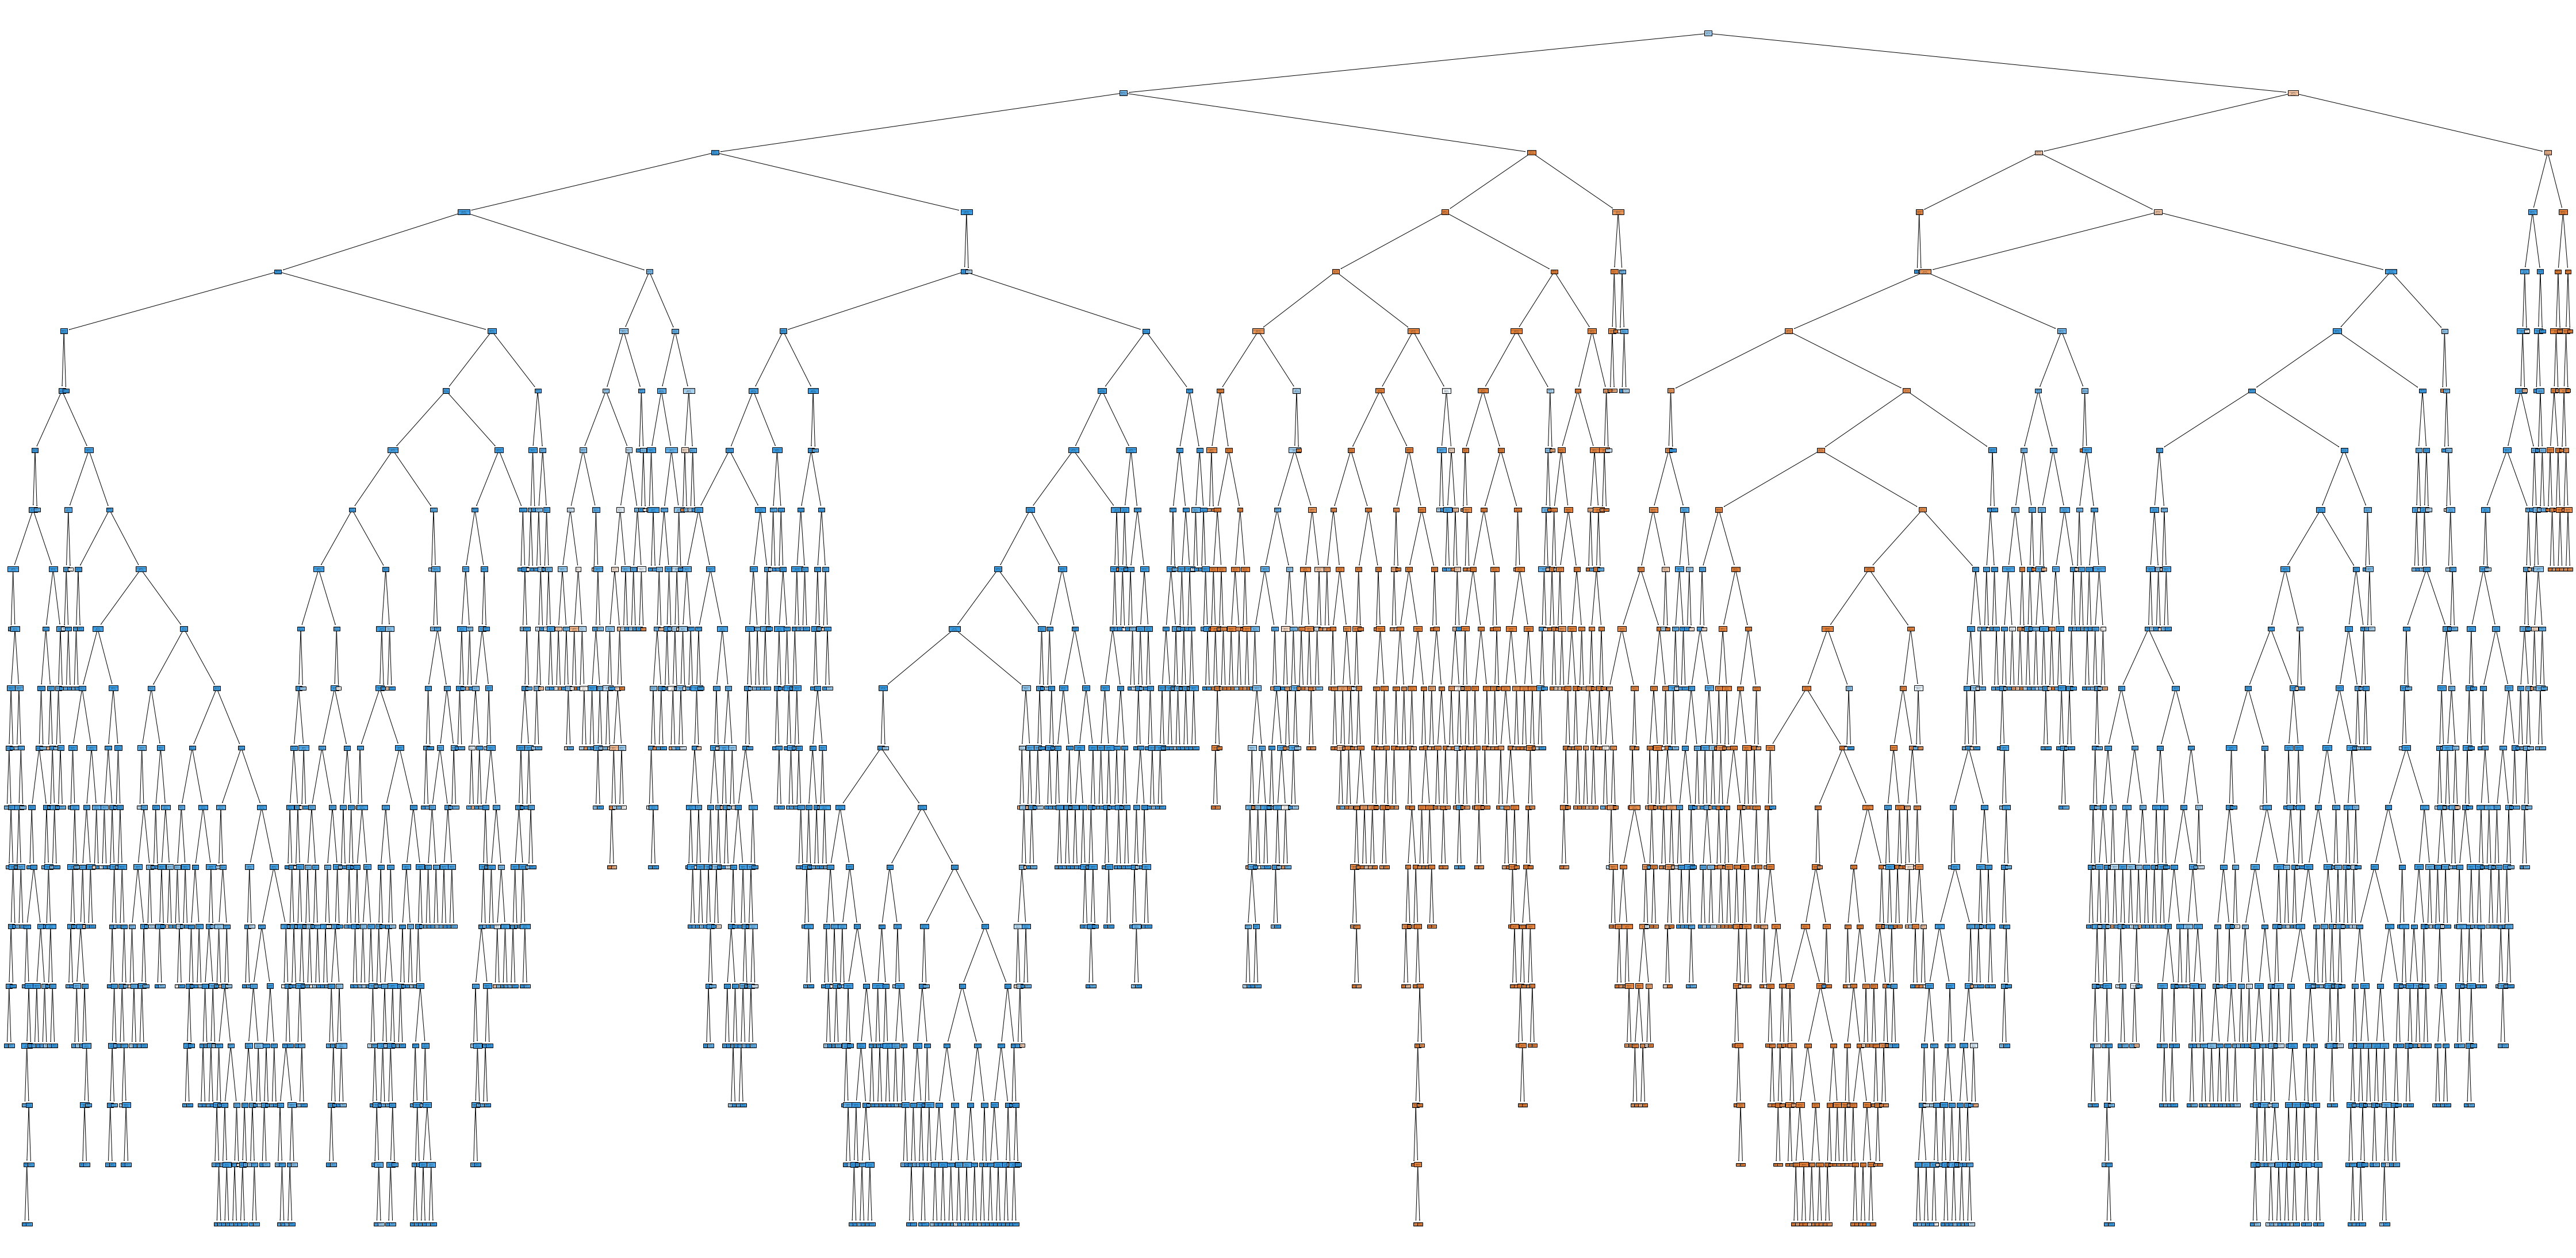

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['skipped', "Not skipped"],filled=True);

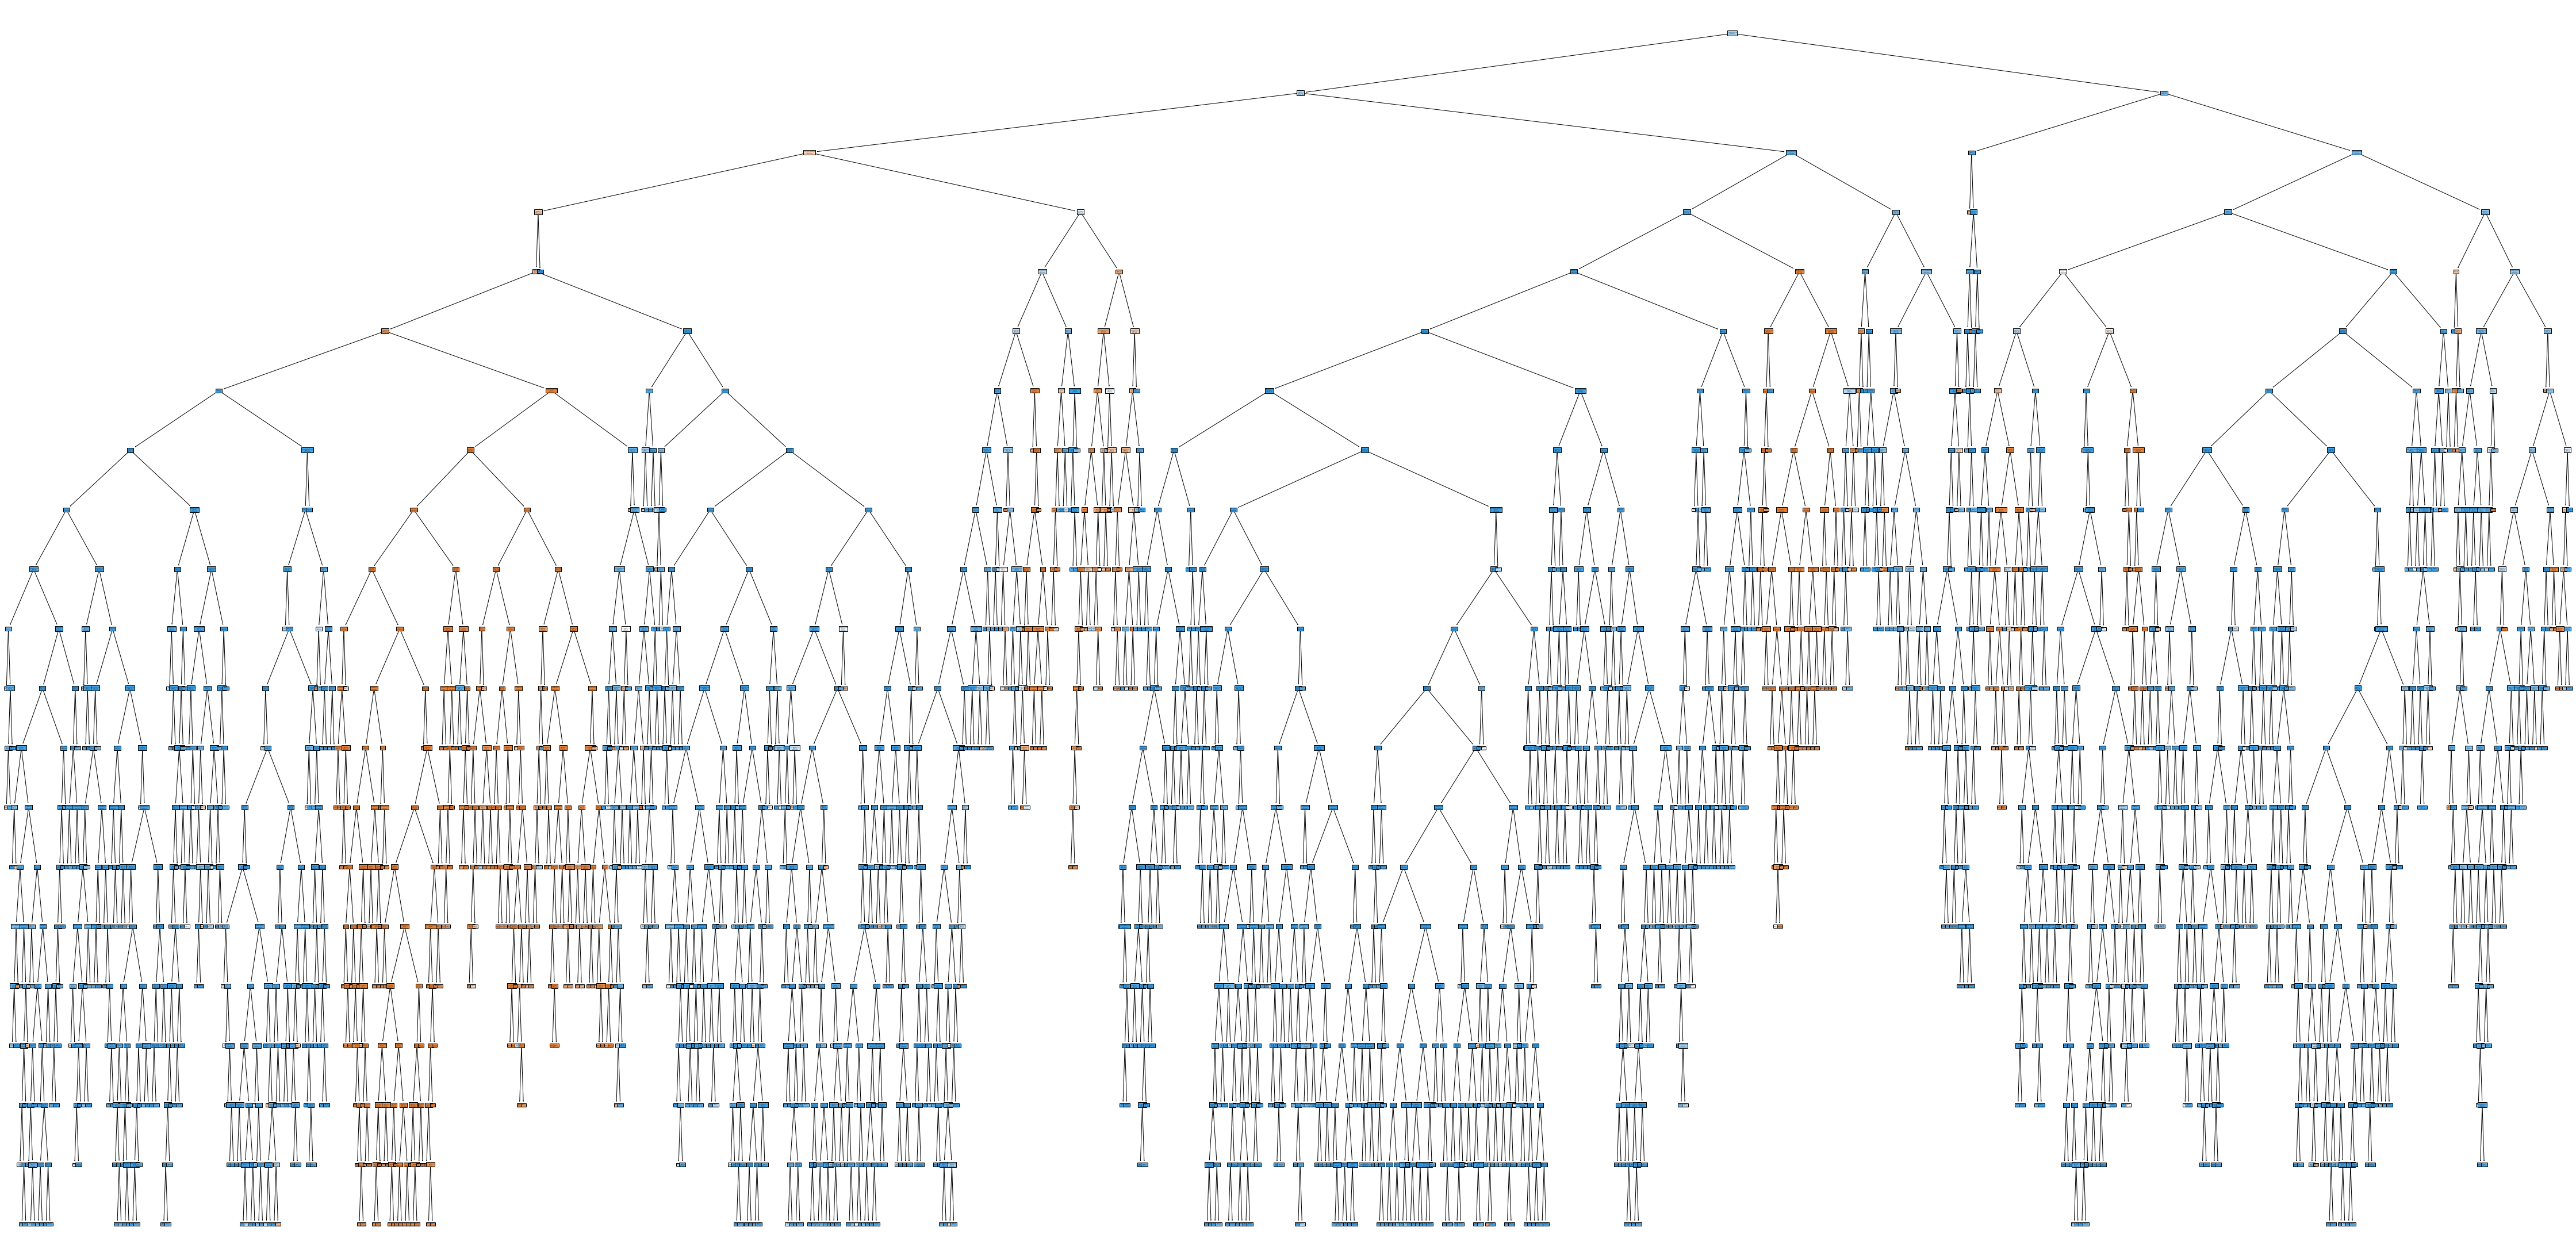

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['skipped', "Not skipped"],filled=True);

The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

Now let’s sort the data with the help of feature importance

In [21]:
rf_best.feature_importances_

array([1.25680430e-03, 1.28035336e-02, 1.09244465e-02, 6.19695854e-03,
       2.15472271e-03, 7.11915839e-04, 1.90090003e-03, 1.48474259e-03,
       1.38014410e-03, 1.45997571e-03, 1.79216034e-03, 1.63725777e-03,
       1.40567101e-03, 1.60531869e-03, 1.49457016e-03, 6.96288476e-05,
       1.46007290e-03, 1.71740175e-03, 1.43902125e-03, 1.55470016e-03,
       1.88663828e-03, 1.53889349e-03, 2.53191033e-04, 5.86245854e-04,
       2.82745819e-04, 2.54003329e-04, 2.28325484e-04, 1.74300912e-04,
       6.72349276e-03, 6.00768072e-03, 7.62014351e-06, 3.79097842e-02,
       5.26098132e-02, 3.93657190e-02, 9.26224504e-06, 4.44632898e-02,
       2.30993619e-01, 5.22255428e-01])

In [22]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [28]:
imp_df = imp_df.sort_values(by="Imp", ascending=False)

In [33]:
imp_df

,Varname,Imp
37,end_trackdone,0.522255
36,end_fwdbtn,0.230994
32,start_trackdone,0.052610
35,end_endplay,0.044463
33,end_backbtn,0.039366
31,start_fwdbtn,0.037910
1,short_pause_before_play,0.012804
2,hist_user_behavior_n_seekfwd,0.010924
28,start_backbtn,0.006723
3,hist_user_behavior_n_seekback,0.006197
